In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
backendQASM = provider.get_backend('ibmq_qasm_simulator')
backendREAL = provider.get_backend('ibmq_burlington')

# ZAD 1

Problem Deutscha
Stawia pytanie jak sprawdzić, do której klasy należy funkcja (czy jest zmienna czy stała) i ile razy musimy wywołać tę funkjcję aby to sprawdzić.

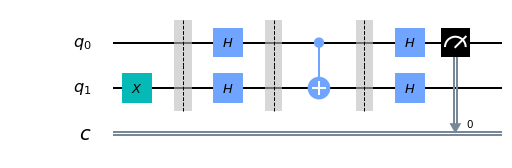

In [8]:
circ1 = QuantumCircuit(2,1)
circ1.x(1)
circ1.barrier()
circ1.h(0)
circ1.h(1)
circ1.barrier()
circ1.cx(0,1) #bramka f1
circ1.barrier()
circ1.h(0)
circ1.h(1)
circ1.measure(0,0)
circ1.draw()


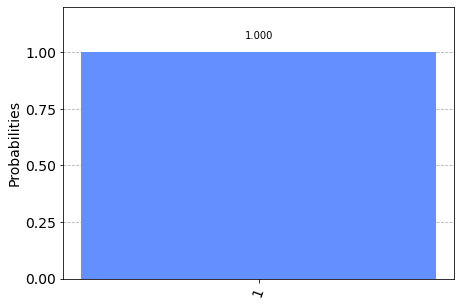

In [9]:
job = execute(circ1, backendQASM)
result = job.result()
counts = result.get_counts(circ1)
plot_histogram(counts)

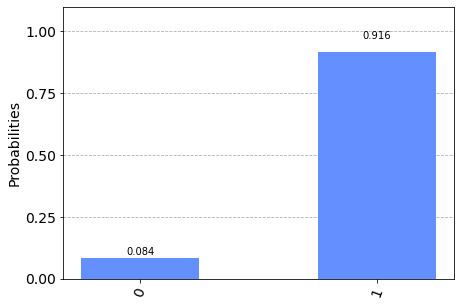

In [32]:
job = execute(circ1, backendREAL)
result = job.result()
counts = result.get_counts(circ1)
plot_histogram(counts)

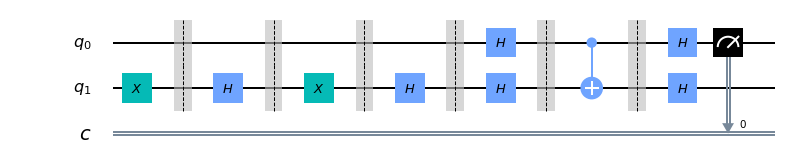

In [23]:
circ2 = QuantumCircuit(2,1)
circ2.x(1)
circ2.barrier()
circ2.h(1)
circ2.barrier()
circ2.x(1) #bramka f2 1/2
circ2.barrier()
circ2.h(1)
circ2.barrier()
circ2.h(0)
circ2.h(1)
circ2.barrier()
circ2.cx(0,1) #bramka f2 2/2
circ2.barrier()
circ2.h(0)
circ2.h(1)
circ2.measure(0,0)
circ2.draw()

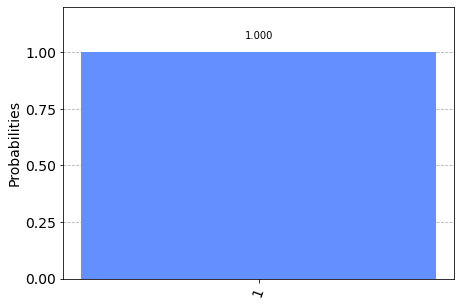

In [24]:
job = execute(circ2, backendQASM)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)

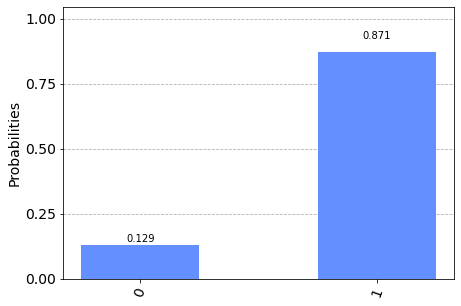

In [33]:
job = execute(circ2, backendREAL)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)

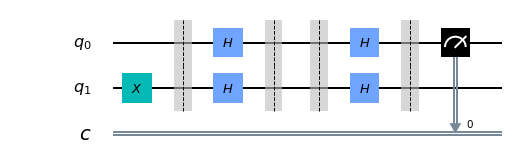

In [2]:
circ3 = QuantumCircuit(2,1)
circ3.x(1)
circ3.barrier()
circ3.h(0)
circ3.h(1)
circ3.barrier()
#bramka f0
circ3.barrier()
circ3.h(0)
circ3.h(1)
circ3.barrier()
circ3.measure(0,0)
circ3.draw()

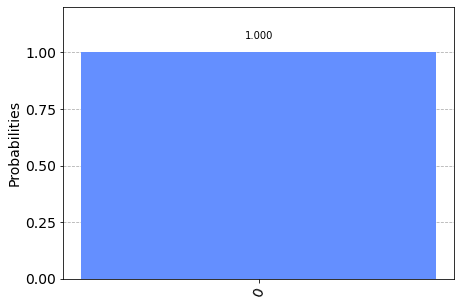

In [19]:
job = execute(circ3, backendQASM)
result = job.result()
counts = result.get_counts(circ3)
plot_histogram(counts)

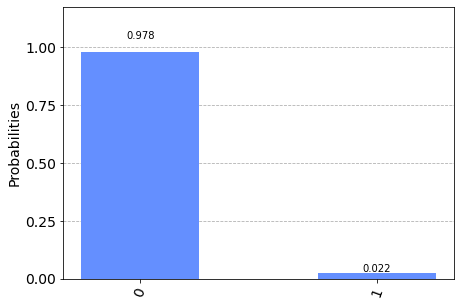

In [44]:
job = execute(circ3, backendREAL)
result = job.result()
counts = result.get_counts(circ3)
plot_histogram(counts)

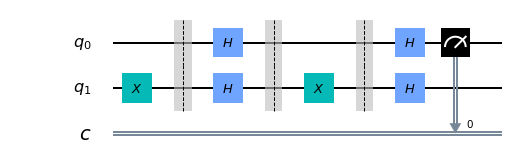

In [29]:
circ4 = QuantumCircuit(2,1)
circ4.x(1)
circ4.barrier()
circ4.h(0)
circ4.h(1)
circ4.barrier()
circ4.x(1) #bramka f3
circ4.barrier()
circ4.h(0)
circ4.h(1)

circ4.measure(0,0)
circ4.draw()

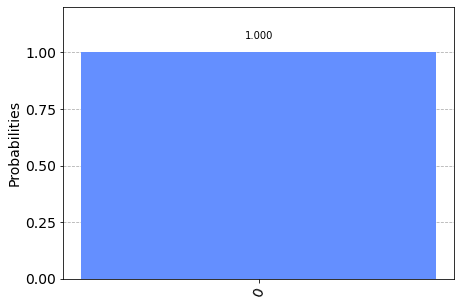

In [37]:
job = execute(circ4, backendQASM)
result = job.result()
counts = result.get_counts(circ4)
plot_histogram(counts)

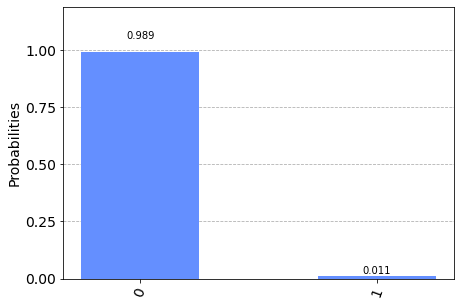

In [38]:
job = execute(circ4, backendREAL)
result = job.result()
counts = result.get_counts(circ4)
plot_histogram(counts)

Wynik znajduje się na rejsetrze wejściowym i jego wartość zgadza się z przewidywanianmi (1 - dla funkcji zmiennych f1 i f2, 0 - dla fynkcji stałych f0 i f3)

# ZAD 2

Probłem polega na znalezieniu ustalonego parametru a z góry określiniego w funkcji f i ile razy musimy odpalić układ żeby to sprawdzić

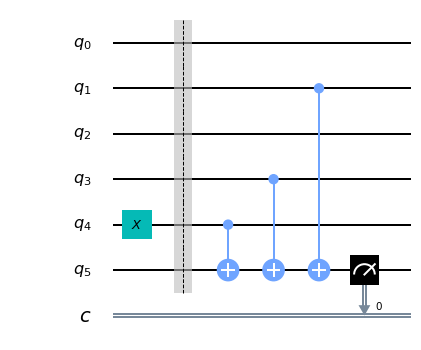

In [15]:
#Rozwiazanie klasyczne
#a = [1 1 0 1 0]

circ5 = QuantumCircuit(6,1)
circ5.x(0)
circ5.barrier()
#bramka Uf {
circ5.cx(4,5)
circ5.cx(3,5)
circ5.cx(1,5)
# }
circ5.measure(5,0)

circ6 = QuantumCircuit(6,1)
circ6.x(1)
circ6.barrier()
#bramka Uf {
circ6.cx(4,5)
circ6.cx(3,5)
circ6.cx(1,5)
# }
circ6.measure(5,0)

circ7 = QuantumCircuit(6,1)
circ7.x(2)
circ7.barrier()
#bramka Uf {
circ7.cx(4,5)
circ7.cx(3,5)
circ7.cx(1,5)
# }
circ5.measure(5,0)

circ8 = QuantumCircuit(6,1)
circ8.x(3)
circ8.barrier()
#bramka Uf {
circ8.cx(4,5)
circ8.cx(3,5)
circ8.cx(1,5)
# }
circ8.measure(5,0)

circ9 = QuantumCircuit(6,1)
circ9.x(4)
circ9.barrier()
#bramka Uf {
circ9.cx(4,5)
circ9.cx(3,5)
circ9.cx(1,5)
# }
circ9.measure(5,0)


circ9.draw()

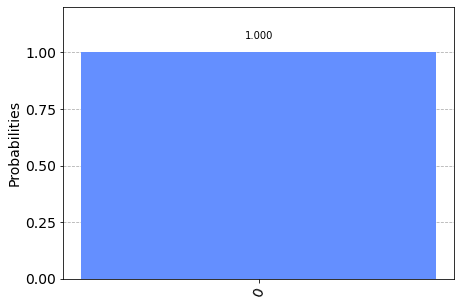

In [17]:
job = execute(circ5, backendQASM)
result = job.result()
counts = result.get_counts(circ5)
plot_histogram(counts)

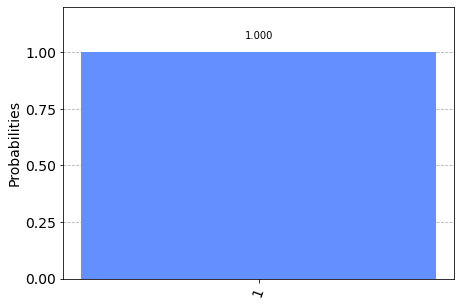

In [18]:
job = execute(circ6, backendQASM)
result = job.result()
counts = result.get_counts(circ6)
plot_histogram(counts)

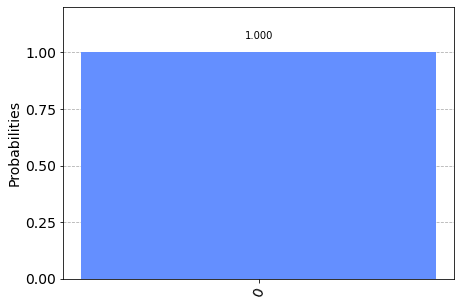

In [19]:
job = execute(circ7, backendQASM)
result = job.result()
counts = result.get_counts(circ7)
plot_histogram(counts)

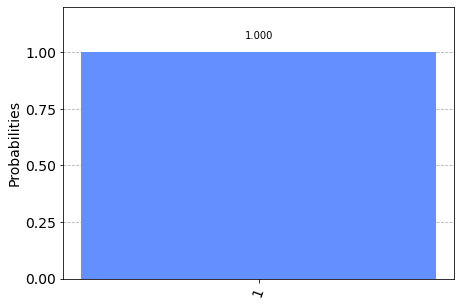

In [20]:
job = execute(circ8, backendQASM)
result = job.result()
counts = result.get_counts(circ8)
plot_histogram(counts)

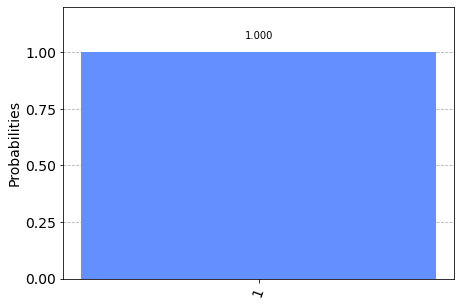

In [21]:
job = execute(circ9, backendQASM)
result = job.result()
counts = result.get_counts(circ9)
plot_histogram(counts)

Rozwiązanie klasuczne wykonujemy uruchamiając układ z kloejnymi maskami (w tym przypadku 10000 01000 00100 00010 00001) a wyniki otrzymujemy na kubicie wyjściowym w postaci jednej wartości odpowiadającej wartości a_i na pozycji odpowiadającej pozycji jedynki w masce. Otrzymany wynik to [1 1 0 1 0] czyli zgadza się on z opisanym bramką Hf stanem a

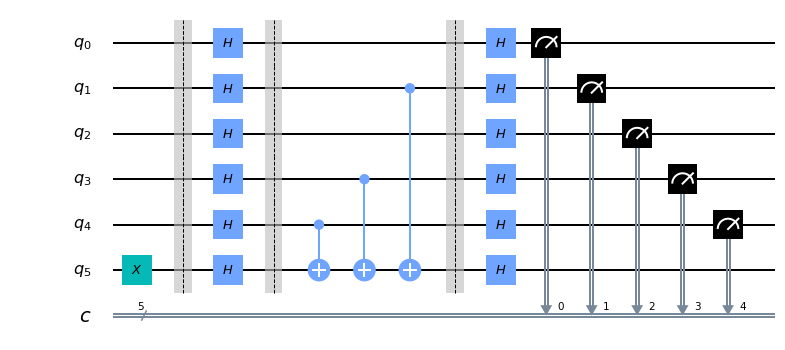

In [28]:
circ10 = QuantumCircuit(6,5)
circ10.x(5)
circ10.barrier()
circ10.h([0,1,2,3,4,5])
circ10.barrier()
#bramka Uf {
circ10.cx(4,5)
circ10.cx(3,5)
circ10.cx(1,5)
# }
circ10.barrier()
circ10.h([0,1,2,3,4,5])
circ10.measure([0,1,2,3,4],[0,1,2,3,4])
circ10.draw()

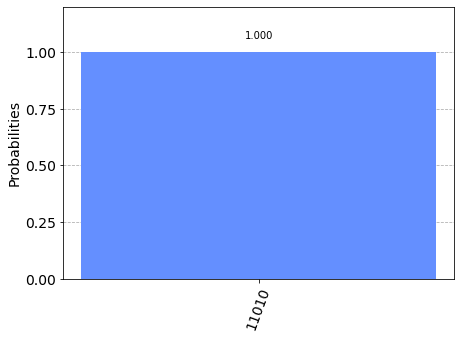

In [29]:
job = execute(circ10, backendQASM)
result = job.result()
counts = result.get_counts(circ10)
plot_histogram(counts)

Rozwiązanie kwantowe otrzymujemy poprzez obłożenie bramki Uf bramkami Hadamarda. Wynik otrzymujemy na kubitach wejściowych. Otrzymany wynik to [1 1 0 1 0] czyli zgadza się on z opisanym bramką Hf stanem a.

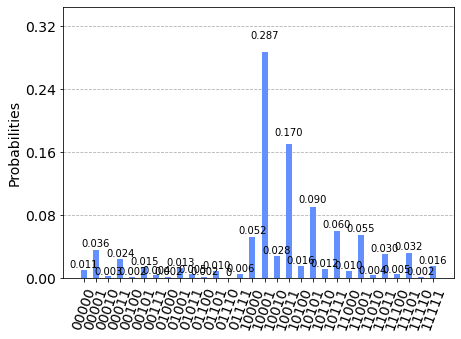

In [30]:
backendMelbourne = provider.get_backend('ibmq_16_melbourne')
job = execute(circ10, backendMelbourne)
result = job.result()
counts = result.get_counts(circ10)
plot_histogram(counts)

Wynik na realnym komputerze kwantowym znacznie odbiega od teorii poprawny wynik ma prawdopodobieństwo około 3%